## Evaluation of Classification Methods

**How to Evaluate a Classification Method?** <br>
- **Predictive accuracy**
- **Efficiency**
    * Time to construct the model
    * Time to use the model
- **Robustness -** ability to handle noise and missing values
- **Scalability -** efficiency in dis-resident databases
- **Interpretability -** easily understandable insight provided by model
- **Compactness -** e.g. size of the tree or number of rules

## Loading libraries and modules

In [85]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, show
from numpy import arange
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Sample Data Sets
This section defines 3 data sets that will be used. 
- Only the actual outcomes ($y$) and the predicted outputs ($\hat{y}$) are given. 
- No $x$ values are given for simplicity. 

This code could be used to evaluate the output and expected values for most model types.

### Binary Classification
Binary classification is a type of classification where there are only 2 possible outcomes, typically:
* true and false, or 
* positive and negative. 

The data below shows the labels for $y$ as being either 0 or 1. 
- The predicted $\hat{y}$ values are probabilities predicted for how likely the output value should be true or 1. 
- `Higher values mean the model predicts a greater likelihood of the value being 1 or True`.

In [86]:
# Binary Classification
binary_classification_y    = [ 1,    0,   1,   1,    0,    0,    1,    0,    0,    1,   0]
binary_classification_yhat = [ 0.95, 0.1, 0.1, 0.99, 0.98, 0.01, 0.02, 0.01, 0.01, .97, 0.05]
binary_classification = pd.DataFrame({'y': binary_classification_y, 'yhat': binary_classification_yhat})
binary_classification

,y,yhat
0,1,0.95
1,0,0.10
2,1,0.10
3,1,0.99
4,0,0.98
5,0,0.01
6,1,0.02
7,0,0.01
8,0,0.01
9,1,0.97


### Multi-Class Classification
Multi-class classification is a type of classification where there are `two or more possible outcomes`. 
- The data below shows the labels for $y$ as having a numeric class ID. Though data might have class labels as strings it will be converted to this numeric ID. 
- The predicted $\hat{y}$ values are probabilities predicted for how likely the output value should match for each of the classes. 
- All class probabilities should sum to 1.0.

In [87]:
# Multi-class Classification (in this case, 4-class)
multiclass_classification_y    = [ 1, 2, 3, 1, 1, 2, 2, 3, 0, 0, 0]
multiclass_classification_yhat = [ 
                                    [0.05, 0.00, 0.90, 0.05],
                                    [0.00, 0.01, 0.99, 0.00],
                                    [0.02, 0.00, 0.03, 0.95],
                                    [0.95, 0.03, 0.02, 0.00],
                                    [0.02, 0.94, 0.01, 0.03],
                                    [0.00, 0.00, 0.93, 0.07],
                                    [0.00, 0.20, 0.80, 0.00],
                                    [0.02, 0.02, 0.01, 0.95],
                                    [0.96, 0.04, 0.00, 0.00],
                                    [0.97, 0.01, 0.01, 0.01],
                                    [0.98, 0.00, 0.00, 0.02]
                                 ]
multiclass_classification = pd.DataFrame(multiclass_classification_yhat)
multiclass_classification.insert(loc = 0, column = 'yhat', value = multiclass_classification_y)
multiclass_classification.columns = ['yhat', 'yhat_0', 'yhat_1', 'yhat_2', 'yhat_3']
multiclass_classification

,yhat,yhat_0,yhat_1,yhat_2,yhat_3
0,1,0.05,0.00,0.90,0.05
1,2,0.00,0.01,0.99,0.00
2,3,0.02,0.00,0.03,0.95
3,1,0.95,0.03,0.02,0.00
4,1,0.02,0.94,0.01,0.03
5,2,0.00,0.00,0.93,0.07
6,2,0.00,0.20,0.80,0.00
7,3,0.02,0.02,0.01,0.95
8,0,0.96,0.04,0.00,0.00
9,0,0.97,0.01,0.01,0.01


In [88]:
# All should sum up to 1.0
(multiclass_classification['yhat_0'] + multiclass_classification['yhat_1'] +
         multiclass_classification['yhat_2'] + multiclass_classification['yhat_3']).tolist()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

### Regression Data

Regression data is used when you wish to predict a number. The data below shows the actual values for $y$ as a floating point number. The predicted $\hat{y}$ should match the $y$ values as close as possible.

In [89]:
# Regression
regression_y    = [ 1.2, 2.2, 3.0, 2.1, 3.5, 3.3, 1.2, 1.2, 0.1, 1, 0.05]
regression_yhat = [ 1.3, 2.9, 3.1, 2.2, 3.5, 3.3, 1.1, 1.3, 7.2, 1, 0.07]
regression = pd.DataFrame({'y': regression_y, 'yhat': regression_yhat})
regression

,y,yhat
0,1.20,1.30
1,2.20,2.90
2,3.00,3.10
3,2.10,2.20
4,3.50,3.50
5,3.30,3.30
6,1.20,1.10
7,1.20,1.30
8,0.10,7.20
9,1.00,1.00


## Accuracy, Precision, Recall & F1-Score
These metrics are closely related. So we'll make use of binary and multi-class data. Binary is covered first. 
- When binary data are used a `threshold value` must be used. 
- Any score from the model `above` the threshold will be `positive/true` and `below` will be `negative/false`. 
- The scores are affected greatly by this choice of threshold. 

Other metrics, such as AUC/ROC, evaluate the model independent of threshold.

In [90]:
THRESHOLD = 0.5

y = np.array(binary_classification_y)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in binary_classification_yhat])

print(f'binary_classification_y: {binary_classification_y}')
print(f'binary_classification_yhat: {binary_classification_yhat}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

binary_classification_y: [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
binary_classification_yhat: [0.95, 0.1, 0.1, 0.99, 0.98, 0.01, 0.02, 0.01, 0.01, 0.97, 0.05]
y: [1 0 1 1 0 0 1 0 0 1 0]
yhat: [1 0 0 1 1 0 0 0 0 1 0]


### False or True and Negatives or Positives
True positives, false positives, true negatives and false negatives must all be calculated to get their associated rates. These rates are used to calculate accuracy and the F1 score.

In [91]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negatice count: {count_neg}')
print(f'Count: {count}')

tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'TP = {tp}, TN = {tn}, FP = {fp} and FN = {fn}')
# print(f'TP_rate = {tp_rate}, TN_rate = {tn_rate}, FP_rate = {fp_rate} and FN_rate = {fn_rate}')
print(f'TP_rate = %0.2f, TN_rate = %0.2f, FP_rate = %0.2f and FN_rate = %0.2f'%(tp_rate, tn_rate, fp_rate, fn_rate))
print(f'True Positive Rate (TP, sensitivity): {tp} ({int(tp_rate * 100)}%)')
print(f'True Negative Rate (TN, specificity): {tn} ({int(tn_rate * 100)}%)')
print(f'False Positive Rate (FP): {fp} ({int(fp_rate * 100)}%)')
print(f'False Negative Rate (FN): {fn} ({int(fn_rate * 100)}%)')

Positive count: 5
Negatice count: 6
Count: 11
TP = 3, TN = 5, FP = 1 and FN = 2
TP_rate = 0.60, TN_rate = 0.83, FP_rate = 0.17 and FN_rate = 0.40
True Positive Rate (TP, sensitivity): 3 (60%)
True Negative Rate (TN, specificity): 5 (83%)
False Positive Rate (FP): 1 (16%)
False Negative Rate (FN): 2 (40%)


### Accuracy
Accuracy is much like a test score - `What percent were correct`. 
- Accuracy does not penalize a model for overconfidence in wrong answers or under-confidence in correct ones. 
- Accuracy ranges from `0% to 100%`. 
- `Higher is better`.

In [92]:
ac1 = (tp + tn) / count
ac2 = metrics.accuracy_score(y, y_hat)
print(f"Accuarcy (manual): {ac1}")
print(f"Accuarcy (from sklearn import metrics): {ac2}")

Accuarcy (manual): 0.7272727272727273
Accuarcy (from sklearn import metrics): 0.7272727272727273


### Precision, Recall & F1-Score

`Precision` (aka <b>positive predictive value</b>) and `Recall` (aka <b>sensitivity</b>) are measurements used both for analysis and calculation of the more holistic F1 score. 
- Precision is "`how useful the results are`", and 
- Recall is "`how complete the results are`". 

> Higher values are better for precision, 
> recall and F1 and they range from 0 to 1. 

<b>F1 is a measure of accuracy that takes into account both false positives and false negatives.</b>

$\mathrm{precision}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}$

$\mathrm{recall}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$

$F_1 = \left(\frac{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}}{2}\right)^{-1} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$

In [93]:
precision = tp / (tp + fp)
precision_sklearn = metrics.precision_score(y, y_hat)

recall = tp / (tp + fn)
recall_sklearn = metrics.recall_score(y, y_hat)

f1 = 2 * (precision * recall) / (precision + recall)
f1_sklearn = metrics.f1_score(y, y_hat)

print(f"recall (manual): {recall}")
print(f"recall (sklearn): {recall_sklearn}")
print(f"precision (manual): {precision}")
print(f"precision (sklearn): {precision_sklearn}")
print(f"f1 (manual): {f1}")
print(f"f1 (sklearn): {f1_sklearn}")

recall (manual): 0.6
recall (sklearn): 0.6
precision (manual): 0.75
precision (sklearn): 0.75
f1 (manual): 0.6666666666666665
f1 (sklearn): 0.6666666666666665


### Confusion Matrix
A confusion matrix tracks `which classes are often misclassified for other classes`. 
- A strong model will have a dark diagonal from NW to SE.

In [94]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 1]
 [2 3]]


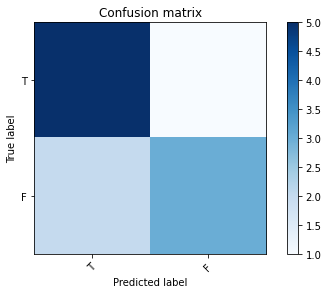

Normalized confusion matrix
[[0.83 0.17]
 [0.4  0.6 ]]


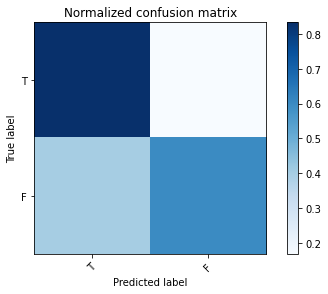

In [95]:
labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)
plt.show()

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')
plt.show()

In [96]:
y = multiclass_classification_y
y_hat = np.argmax(multiclass_classification_yhat, axis = 1)

print(f'y: {y}')
print(f'yhat: {y_hat}')

y: [1, 2, 3, 1, 1, 2, 2, 3, 0, 0, 0]
yhat: [2 2 3 0 1 2 2 3 0 0 0]


In [97]:
ac = metrics.accuracy_score(y, y_hat)
# average = None: scores for each class are returned
f1 = metrics.f1_score(y, y_hat, average = None)
print(f"Accuarcy: {ac}")
print(f"F1: {f1}")

Accuarcy: 0.8181818181818182
F1: [0.86 0.5  0.86 1.  ]


Confusion matrix, without normalization
[[3 0 0 0]
 [1 1 1 0]
 [0 0 3 0]
 [0 0 0 2]]


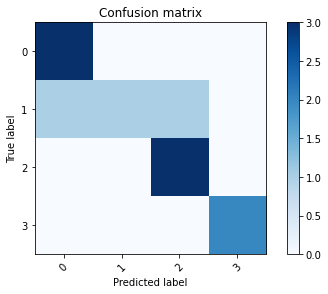

Normalized confusion matrix
[[1.   0.   0.   0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]


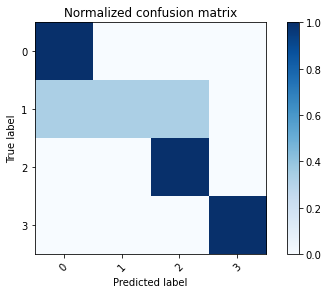

In [98]:
labels = ['0', '1', '2', '3']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)
plt.show()

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title='Normalized confusion matrix')
plt.show()

## Area Under the Curve (AUC)
Area Under the Curve (AUC) is closely related to the (Receiver Operating Characteristic) ROC chart. Both will make use of the binary classification data.

In [99]:
y = np.array(binary_classification_y)
y_hat = np.array(binary_classification_yhat)
print (f"y = {y}")
print (f"y_hat = {y_hat}")

y = [1 0 1 1 0 0 1 0 0 1 0]
y_hat = [0.95 0.1  0.1  0.99 0.98 0.01 0.02 0.01 0.01 0.97 0.05]


In [100]:
# E:\Arnab Docs\Machine Learning\ROC AUC\ROC AUC Calculations.xlsx
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [101]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_hat)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [1 0 1 1 0 0 1 0 0 1 0]
Y_HAT: [0.95 0.1  0.1  0.99 0.98 0.01 0.02 0.01 0.01 0.97 0.05]
FPR: [0.   0.   0.17 0.17 0.33 0.5  0.5  1.  ]
TPR: [0.  0.2 0.2 0.6 0.8 0.8 1.  1. ]
thresholds: [1.99 0.99 0.98 0.95 0.1  0.05 0.02 0.01]
Optimal threshold index: 6
Optimal threshold value: 0.02
AUC: 0.7833333333333333


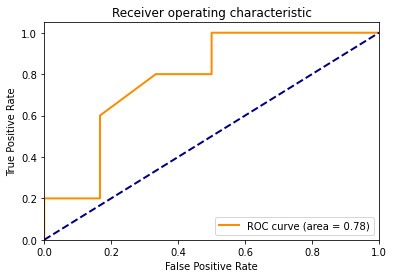

In [102]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [103]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.   0.17 0.17 0.33 0.5  0.5  1.  ]
TPR: [0.  0.2 0.2 0.6 0.8 0.8 1.  1. ]
thresholds: [1.99 0.99 0.98 0.95 0.1  0.05 0.02 0.01]


In general, a ROC chart with a large amount of space below the curve is desirable. Below 0.5 is a very bad model and the closer to 1.0 you can go (without overfitting) the better.

## Decile Analysis
Decile analysis or top 10% scoring looks at the distribution of positive values among 10 bins. Sort the predicted probabilities from highest to lowest and determine the percent of each bin that are positively scored outcomes. The higher bins should have higher percents and the lower scores should have lower. The percent for the top bin can be used as a score.

**What is "Decile Analysis"?**<br>
Decile analysis is a statistical technique that involves dividing a set of data into ten equal parts, or deciles, based on the values of a particular variable. This technique is often used in marketing, finance, and other fields to analyze patterns and trends in data.

To perform a decile analysis, the data is first sorted in ascending or descending order based on the variable of interest. The data is then divided into ten equal parts, with each part containing an equal number of observations. The range of values in each decile is then calculated, and various statistical measures, such as means, medians, or percentages, can be computed for each decile.

Decile analysis is useful for identifying patterns and trends in a dataset, especially when the data is skewed or has outliers. By dividing the data into ten equal parts, it is possible to identify which parts of the data have higher or lower values and to compare the distribution of values across different deciles. This can help to reveal patterns or trends that may be obscured by the overall distribution of the data.

Decile analysis can also be used to segment customers or other entities based on their behavior or characteristics, such as purchase history or demographic variables. By dividing the data into ten segments, it is possible to identify which segments have higher or lower values for a particular variable and to target specific segments with marketing or other interventions.

In [104]:
binary_classification_y    = [ 1,    0,   1,   1,    0,    0,    1,    0,    0,    1,   0]
binary_classification_yhat = [ 0.95, 0.1, 0.1, 0.99, 0.98, 0.01, 0.02, 0.01, 0.01, .97, 0.05]
y = np.array(binary_classification_y)
y_hat = np.array(binary_classification_yhat)

In [105]:
y

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [106]:
y_hat

array([0.95, 0.1 , 0.1 , 0.99, 0.98, 0.01, 0.02, 0.01, 0.01, 0.97, 0.05])

In [107]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
print (y_hat, len(y_hat))
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)   # values below 0.01 are set to 0.01, and values above 0.99 are set to 0.99
print(y_hat, len(y_hat))

[0.95 0.1  0.1  0.99 0.98 0.01 0.02 0.01 0.01 0.97 0.05 0.95 0.1  0.1
 0.99 0.98 0.01 0.02 0.01 0.01 0.97 0.05 0.95 0.1  0.1  0.99 0.98 0.01
 0.02 0.01 0.01 0.97 0.05 0.95 0.1  0.1  0.99 0.98 0.01 0.02 0.01 0.01
 0.97 0.05] 44
[0.99 0.09 0.16 0.99 0.96 0.01 0.18 0.09 0.01 0.99 0.01 0.9  0.12 0.01
 0.82 0.92 0.01 0.05 0.01 0.01 0.99 0.03 0.96 0.01 0.05 0.99 0.86 0.05
 0.01 0.01 0.01 0.99 0.05 0.84 0.18 0.01 0.99 0.78 0.01 0.04 0.08 0.03
 0.96 0.02] 44


### Explanation of the following code
In the following code is using the pandas library's qcut method to create 10 equal-sized bins for the range of integers from 0 to the length of the DataFrame df.

Specifically, **pd.qcut(range(len(df)), 10, labels=False)** is creating the bins and assigning each value in the range of 0 to the length of df to a bin number between 0 and 9 (since labels=False returns the bin numbers rather than labels for the bins).

The +1 at the end is then adding 1 to each bin number so that the bin numbers range from 1 to 10 instead of 0 to 9. This is often done to make the bin numbers more human-readable or to match other conventions.

In [108]:
df = pd.DataFrame({'y':y,'y_hat':y_hat})
df.sort_values(by='y_hat',ascending = False, inplace = True)
df['bucket'] = pd.qcut(range(len(df)), 10, labels = False) + 1
df

,y,y_hat,bucket
0,1,0.990000,1
9,1,0.990000,1
3,1,0.990000,1
36,1,0.990000,1
31,1,0.990000,1
25,1,0.990000,2
20,1,0.990000,2
42,1,0.958435,2
22,1,0.956753,2
4,0,0.956585,3


In [109]:
df.drop('y_hat', 1, inplace=True)
df['count'] = np.ones(len(df))
df = df.groupby(by='bucket').sum()
df

<ipython-input-109-733aca657d60>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('y_hat', 1, inplace=True)


,y,count
bucket,,
1,5,5.0
2,4,4.0
3,1,4.0
4,3,5.0
5,1,4.0
6,1,4.0
7,2,5.0
8,1,4.0
9,1,4.0


In [110]:
df['score'] = df['y'].values / df['count'].values
df.columns = ['tp','count','score']
df

,tp,count,score
bucket,,,
1,5,5.0,1.00
2,4,4.0,1.00
3,1,4.0,0.25
4,3,5.0,0.60
5,1,4.0,0.25
6,1,4.0,0.25
7,2,5.0,0.40
8,1,4.0,0.25
9,1,4.0,0.25


<ipython-input-111-6bcaec7a0daa>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('count', 1, inplace=True)
<ipython-input-111-6bcaec7a0daa>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('tp', 1, inplace=True)


<AxesSubplot:xlabel='bucket'>

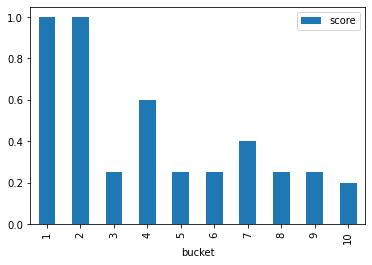

In [111]:
df.drop('count', 1, inplace=True)
df.drop('tp', 1, inplace=True)
df.plot(kind = "bar")

## Regression Chart
The regression or lift chart can be drawn in various ways. Presented here is a monotonically increasing plot of the expected values with the predicted values. Ideally, the two lines would overlap. However, they can show a model's tendency to over or under predict.

### Regression Data

Regression data is used when you wish to predict a number. The data below shows the expected values for $y$ as a floating point number. The predicted $\hat{y}$ should match the $y$ values as close as possible.

In [112]:
# Regression
regression_y    = [ 1.2, 2.2, 3.0, 2.1, 3.5, 3.3, 1.2, 1.2, 0.1, 1, 0.05]
regression_yhat = [ 1.3, 2.9, 3.1, 2.2, 3.5, 3.3, 1.1, 1.3, 7.2, 1, 0.07]
regression = pd.DataFrame({'y': regression_y, 'yhat': regression_yhat})
regression

,y,yhat
0,1.20,1.30
1,2.20,2.90
2,3.00,3.10
3,2.10,2.20
4,3.50,3.50
5,3.30,3.30
6,1.20,1.10
7,1.20,1.30
8,0.10,7.20
9,1.00,1.00


In [113]:
y = np.array(regression_y)
y_hat = np.array(regression_yhat)

In [114]:
# Regression chart.
def chart_regression(pred, y, sort = True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace = True)
    plt.plot(t['y'].tolist(), label = 'expected')
    plt.plot(t['pred'].tolist(), label = 'prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

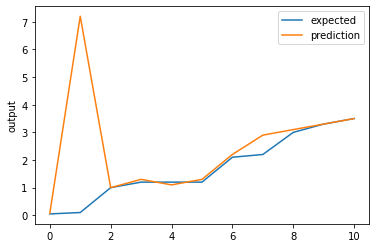

In [115]:
chart_regression(y_hat, y)

## Log Loss

Log loss can measure single or multi-classification. Lower values are good, higher values are bad. The best possible score is 0 and scores above 2-3 are generally bad. Log-loss penalizes over confidence.

Single:

$ \text{log loss} = -{(y\log(\hat{y}) + (1 - y)\log(1 - \hat{y}))} $

Multi-class:

$ \text{log loss} = -\frac{1}{N}\sum_{i=1}^N {( {y}_i\log(\hat{y}_i) + (1 - {y}_i)\log(1 - \hat{y}_i))} $

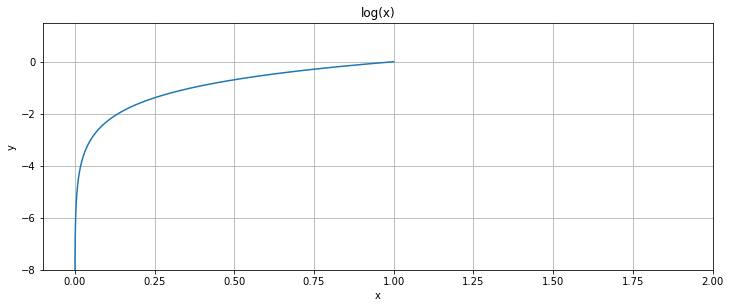

In [116]:
t = arange(1e-6, 1.0, 0.00001)  

fig = figure(1, figsize=(12, 10))

ax1 = fig.add_subplot(211)  # These are subplot grid parameters encoded as a single integer.
                            # Check this link: https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()

In [117]:
y = np.array(binary_classification_y)
y_hat = np.array(binary_classification_yhat)

In [118]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.9459307962892708


In [119]:
# What is a good log loss?
print(f"Perfect score (1.0): {np.log(1.0)}")
print(f"95% Prediction on True : {np.log(0.95)}")
print(f"90% Prediction on True : {np.log(0.90)}")
print(f"85% Prediction on True : {np.log(0.85)}")
print(f"80% Prediction on True : {np.log(0.80)}")
print(f"75% Prediction on True : {np.log(0.75)}")
print(f"70% Prediction on True : {np.log(0.70)}")
print(f"65% Prediction on True : {np.log(0.65)}")
print(f"60% Prediction on True : {np.log(0.60)}")
print(f"55% Prediction on True : {np.log(0.55)}")
print(f"40% Prediction on True : {np.log(0.4)}")
print(f"30% Prediction on True : {np.log(0.3)}")
print(f"10% Prediction on True : {np.log(0.1)}")
print(f"1% Prediction on True : {np.log(0.01)}")
print(f"0.001% Prediction on True : {np.log(0.001)}")

Perfect score (1.0): 0.0
95% Prediction on True : -0.05129329438755058
90% Prediction on True : -0.10536051565782628
85% Prediction on True : -0.16251892949777494
80% Prediction on True : -0.2231435513142097
75% Prediction on True : -0.2876820724517809
70% Prediction on True : -0.35667494393873245
65% Prediction on True : -0.4307829160924542
60% Prediction on True : -0.5108256237659907
55% Prediction on True : -0.5978370007556204
40% Prediction on True : -0.916290731874155
30% Prediction on True : -1.2039728043259361
10% Prediction on True : -2.3025850929940455
1% Prediction on True : -4.605170185988091
0.001% Prediction on True : -6.907755278982137


In [120]:
list(zip(y, y_hat))

[(1, 0.95),
 (0, 0.1),
 (1, 0.1),
 (1, 0.99),
 (0, 0.98),
 (0, 0.01),
 (1, 0.02),
 (0, 0.01),
 (0, 0.01),
 (1, 0.97),
 (0, 0.05)]

## R<sup>2</sup>
R<sup>2</sup> is a value that measures the goodness of fit. They typically range between 0 and 1 and are often written as percentages. Particularly bad R2 values can be negative.

In [121]:
y = np.array(regression_y)
y_hat = np.array(regression_yhat)
print (y, len(y))
print (y_hat, len(y_hat))

[1.2  2.2  3.   2.1  3.5  3.3  1.2  1.2  0.1  1.   0.05] 11
[1.3  2.9  3.1  2.2  3.5  3.3  1.1  1.3  7.2  1.   0.07] 11


(from Wikipedia) If $\bar{y}$ is the mean of the observed data:

$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$

then the variability of the data set can be measured using three Mean squared error formulas:

The total sum of squares (proportional to the variance of the data $SS_\text{tot}=\sum_i (y_i-\bar{y})^2,$
The regression sum of squares, also called the explained sum of squares:
$SS_\text{reg}=\sum_i (f_i -\bar{y})^2,$
The sum of squares of residuals, also called the residual sum of squares:
$SS_\text{res}=\sum_i (y_i - f_i)^2=\sum_i e_i^2\,$
The most general definition of the coefficient of determination is

:$R^2 \equiv 1 - {SS_{\rm res}\over SS_{\rm tot}} \,$

In [122]:
r2 = metrics.r2_score(y, y_hat)
print(f"R2 Score: {r2}")
print(list(zip(y, y_hat)))

R2 Score: -2.5332034672970853
[(1.2, 1.3), (2.2, 2.9), (3.0, 3.1), (2.1, 2.2), (3.5, 3.5), (3.3, 3.3), (1.2, 1.1), (1.2, 1.3), (0.1, 7.2), (1.0, 1.0), (0.05, 0.07)]


## RMSE and MSE
Mean square error and root mean square error are used to measure regression. MSE is simply a value where higher values indicate a worse model. MSE is not in the same units as $y$, whereas RMSE is in the same units. RMSE will not be negative and a value of 10 would mean that the errors are generally +/- 10 units.

In [123]:
y = np.array(regression_y)
y_hat = np.array(regression_yhat)


$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $

In [124]:
mse = metrics.mean_squared_error(y_hat, y)
print("Score (MSE): {}".format(mse))

Score (MSE): 4.631854545454546



$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $

In [125]:
rmse = np.sqrt(mse)
print("Score (RMSE): {}".format(np.sqrt(mse)))

Score (RMSE): 2.1521743761727454
